# FUNCIONES

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

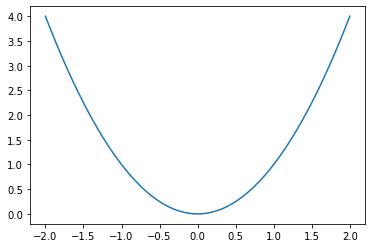

In [32]:
# x y y son variables
x = np.arange(-2, 2.05, 0.05)
y = x ** 2

plt.plot(x, y)

In [33]:
x

array([-2.00000000e+00, -1.95000000e+00, -1.90000000e+00, -1.85000000e+00,
       -1.80000000e+00, -1.75000000e+00, -1.70000000e+00, -1.65000000e+00,
       -1.60000000e+00, -1.55000000e+00, -1.50000000e+00, -1.45000000e+00,
       -1.40000000e+00, -1.35000000e+00, -1.30000000e+00, -1.25000000e+00,
       -1.20000000e+00, -1.15000000e+00, -1.10000000e+00, -1.05000000e+00,
       -1.00000000e+00, -9.50000000e-01, -9.00000000e-01, -8.50000000e-01,
       -8.00000000e-01, -7.50000000e-01, -7.00000000e-01, -6.50000000e-01,
       -6.00000000e-01, -5.50000000e-01, -5.00000000e-01, -4.50000000e-01,
       -4.00000000e-01, -3.50000000e-01, -3.00000000e-01, -2.50000000e-01,
       -2.00000000e-01, -1.50000000e-01, -1.00000000e-01, -5.00000000e-02,
        1.77635684e-15,  5.00000000e-02,  1.00000000e-01,  1.50000000e-01,
        2.00000000e-01,  2.50000000e-01,  3.00000000e-01,  3.50000000e-01,
        4.00000000e-01,  4.50000000e-01,  5.00000000e-01,  5.50000000e-01,
        6.00000000e-01,  

In [13]:
# funcion que sume dos numeros a y b
#1. def
#2. nombre de la funcion (nombre de la variable)
#3. abrimos y cerramos parentesis ()
#4. Colocamos :
#5. Escribimos el codigo de la funcion indentado a la derecha
message = "Mensaje"

def saludar(nombre):
    print("Hola " + nombre)
    print(nombre.upper())

In [6]:
# usar funcion
# nombre de la funcion y parentesis
saludar()

Hola usuario


In [14]:
nombre_usuario = input("Ingrese su nombre: ")
saludar(nombre_usuario)

Ingrese su nombre: Edward
Hola Edward
EDWARD


In [16]:
saludar("Wilson")

Hola Wilson
WILSON


In [18]:
saludar(5)

TypeError: can only concatenate str (not "int") to str

In [30]:
def sumar(numero1, numero2):
    if type(numero1) == int and type(numero2) == int:    
        resultado = numero1 + numero2
        print(resultado)

In [34]:
numero_cinco = sumar(3, 2)
print(numero_cinco)

5
None


In [31]:
sumar("Hola", " Mundo")

In [35]:
type(5)

int

In [36]:
def sumar_con_return(numero1, numero2):
    if type(numero1) == int and type(numero2) == int:    
        resultado = numero1 + numero2
        return resultado

In [43]:
resultado = sumar_con_return(3, 5)
print(resultado)

8


# RETO FLEXIÓN

In [62]:
P = 700
Q = 50
R = 150

L = 2.5

b = 400
h = 300
t = 5

x = sp.symbols('x')
x

x

In [66]:
A = b * t + (h - t) * t
Iy = b ** 3 * t / 12 + (h - t) * t ** 3 / 12
centroide = (b * t * (h - t / 2) + (h - t) * t * (h - t) / 2) / A
Iz = b * t ** 3 / 12 + (h - t) ** 3 * t  / 12 + b * t * ((h - t / 2) - centroide) ** 2 + (h - t) * t * ((h - t) / 2 - centroide) ** 2

375.0 - 150*x

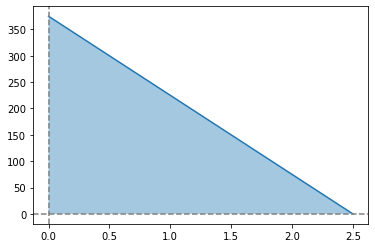

In [58]:
# PLANO Y - X

cortante_yx = -R
Ma = R * L

momento_yx = sp.integrate(cortante_yx, x) + Ma

x_array = np.arange(0, L + 0.05, 0.05)
array_momento = sp.lambdify(x, momento_yx)(x_array)

plt.plot(x_array, array_momento)
plt.fill_between(x_array, array_momento, alpha=0.4)
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
momento_yx

50*x - 125.0

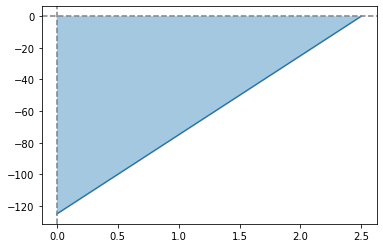

In [61]:
# PLANO X - Z

cortante_xz = Q
Ma = Q * L

momento_xz = sp.integrate(cortante_xz, x) - Ma

array_momento = sp.lambdify(x, momento_xz)(x_array)

plt.plot(x_array, array_momento)
plt.fill_between(x_array, array_momento, alpha=0.4)
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
momento_xz

In [68]:
# CALCULAR ESFUERZOS
# MPa
esfuerzo_compresion = - P * 10 ** 3 / A
esfuerzo_compresion

-201.4388489208633

In [75]:
def obtener_esfuerzo(valor_x, y, z):
    My = momento_xz.subs(x, valor_x)
    Mz = momento_yx.subs(x, valor_x)
    return esfuerzo_compresion + My * 10 ** 6 * z / Iy - Mz * 10 ** 6 * y / Iz

obtener_esfuerzo(0, h - centroide, b / 2)

-1971.44748458559

In [79]:
obtener_esfuerzo(0, h - centroide, np.arange(-b / 2, b / 2 + 0.05, 0.05))

array([-96.6635241435310, -96.8978721385863, -97.1322201336417, ...,
       -1970.97878859590, -1971.21313659096, -1971.44748458602],
      dtype=object)

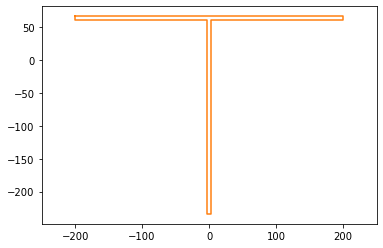

In [100]:
# EJE NEUTRO 

def graficar_eje_neutro(valor_x):
    if valor_x < L:
        valores_y = np.arange(-centroide, h - centroide + 0.05, 0.05)
        eje_neutro =(-esfuerzo_compresion + valores_y * float(momento_yx.subs(x, valor_x)) * 10 ** 6 / Iz) * Iy / (float(momento_xz.subs(x, valor_x)) * 10 ** 6)
        plt.plot(eje_neutro, valores_y, linestyle='--')
    else:
        plt.title("No hay eje neutro")
        
    plt.plot([-b / 2, b / 2, b / 2, t / 2, t / 2, - t / 2, -t / 2, -b / 2, -b / 2], [h - centroide, h - centroide, h - centroide - t, h - centroide - t, -centroide, -centroide, h - centroide - t, h - centroide - t, h - centroide])
    plt.xlim([-b / 2  - 50, b / 2 + 50])
    
    
graficar_eje_neutro()